# Test a Multiple Regression Model

This is an assignment for week 3 of 'Regression Modeling in Practice' course by Wesleyan University.

The task at hand is to model a multiple regression for chosen dataset and:
1. Discuss the results for the associations between all  explanatory variables and response variable
2. Report whether results supported the original hypothesis
3. Discuss whether there was evidence of confounding for the association between your primary explanatory and response variable
4. Generate regression diagnostic plots

The dataset was prepared earlier and contains information about 217 countries for 2017: GDP, imports, exports, population, ease of doing business, whether a country is lanlocked and WTO status. 
The original hypotesis is that the country's level of income is positevely associated with trade openness.

## Prepare the dataset 

In [18]:
import numpy
import pandas
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn

In [2]:
# Download prepared csv file
data = pd.read_csv('openness_df.csv')

In [3]:
data.sample(5)

,country,year,gdp,gdp_ppc,imports,exports,population,business_ease,code,region,tariff,wto_status,landlocked,remoteness,openness
56,Ecuador,2017,1.042959e+11,6213.501276,2.251633e+10,2.172777e+10,16785361.0,57.49538,ECU,Latin America & Caribbean,9.242951,Member,0,6.237494e+10,0.424217
157,Poland,2017,5.262165e+11,13856.982389,2.640066e+11,2.860202e+11,37974826.0,77.85723,POL,Europe & Central Asia,NaN,Member,0,9.455824e+11,1.045248
15,Benin,2017,1.270166e+10,1136.592847,4.352985e+09,3.455561e+09,11175204.0,51.57576,BEN,Sub-Saharan Africa,12.977247,Member,0,1.007522e+10,0.614766
195,Tonga,2017,4.301742e+08,4217.476507,3.024655e+08,1.016060e+08,101998.0,61.57496,TON,East Asia & Pacific,5.841528,Member,0,1.905590e+09,0.939321
111,St. Lucia,2017,1.816729e+09,10039.671414,NaN,NaN,180955.0,63.57439,LCA,Latin America & Caribbean,12.488861,Member,0,1.165681e+10,NaN


In [4]:
data = data[['country','gdp_ppc','business_ease','landlocked','remoteness','openness']]
data.head()

,country,gdp_ppc,business_ease,landlocked,remoteness,openness
0,Aruba,25630.266492,NaN,0,1.108622e+10,1.460488
1,Afghanistan,556.302139,37.13062,1,7.128366e+09,0.512369
2,Angola,4095.812942,39.00774,0,8.959651e+10,0.522568
3,Albania,4532.890162,66.83770,0,3.182474e+10,0.781613
4,Andorra,39134.393371,NaN,1,5.166615e+10,NaN


In [5]:
data.dropna(inplace=True)
data = data[data['remoteness'] > 0]

In [6]:
# Log-transform variables 
data['log_gdp'] = np.log(data['gdp_ppc'])
data['log_b'] = np.log(data['business_ease'])
data['log_r'] = np.log(data['remoteness'])
data['log_o'] = np.log(data['openness'])

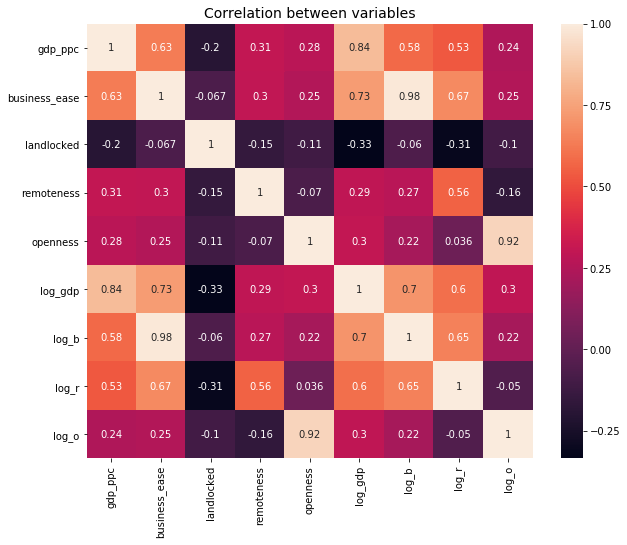

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display correlation coefficient
mtx_cor = data.corr()

# Build a heatmap with Seaborn library
plt.figure(figsize=(10,8))
sns.heatmap(data=mtx_cor, annot=True)

plt.title('Correlation between variables', fontsize=14)
plt.show()

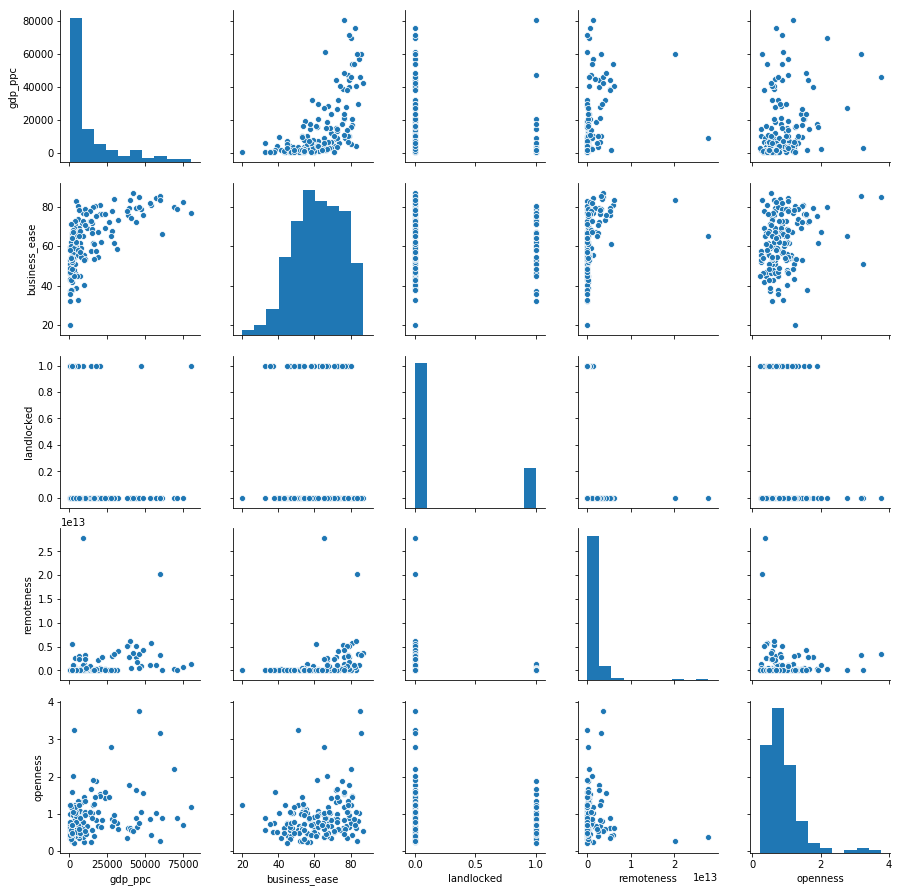

In [8]:
sns.pairplot(data[['country','gdp_ppc','business_ease','landlocked','remoteness','openness']])

## Exploring the relationship between Trade Openness & Income Levels

Text(0.5, 1.01, "The Association Between Trade Openness and Country's Level of Income")

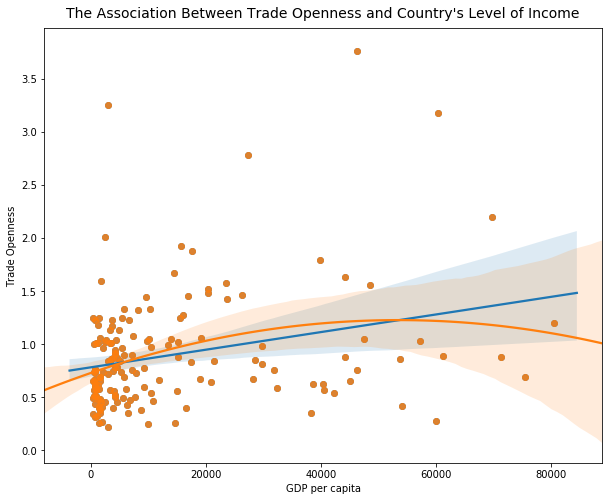

In [10]:
plt.figure(figsize=(10,8))
sns.regplot(x="gdp_ppc", y="openness", scatter=True, data=data)
sns.regplot(x="gdp_ppc", y="openness", scatter=True, order=2, data=data)
plt.xlabel('GDP per capita')
plt.ylabel('Trade Openness')
plt.title ("The Association Between Trade Openness and Country's Level of Income", fontsize=14, y=1.01)

Text(0.5, 1.01, 'Linear & Quadratic Fit after Log Transformation')

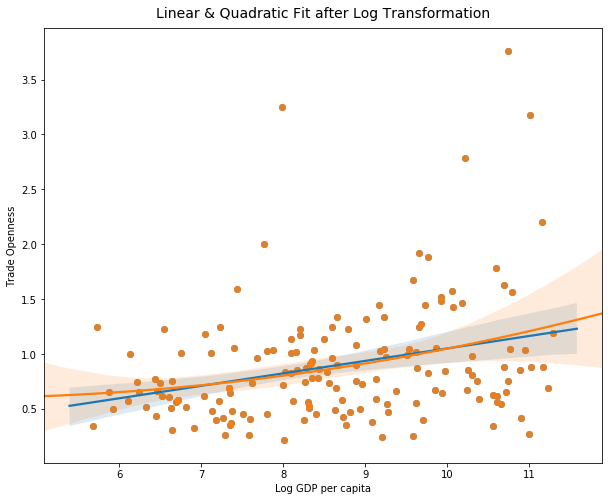

In [11]:
plt.figure(figsize=(10,8))
sns.regplot(x="log_gdp", y="openness", scatter=True, data=data)
sns.regplot(x="log_gdp", y="openness", scatter=True, order=2, data=data)
plt.xlabel('Log GDP per capita')
plt.ylabel('Trade Openness')
plt.title ("Linear & Quadratic Fit after Log Transformation", fontsize=14, y=1.01)

Text(0.5, 1.01, 'Linear & Quadratic Fit after Log Transformation')

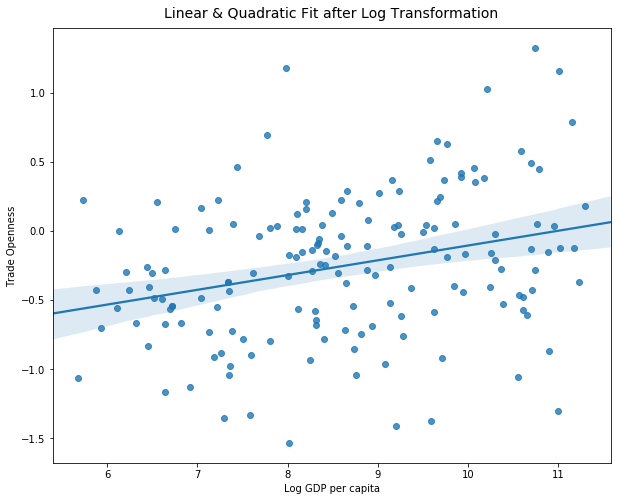

In [12]:
plt.figure(figsize=(10,8))
sns.regplot(x="log_gdp", y="log_o", scatter=True, data=data)

plt.xlabel('Log GDP per capita')
plt.ylabel('Trade Openness')
plt.title ("Linear & Quadratic Fit after Log Transformation", fontsize=14, y=1.01)

## Exploring the Relationship between Trade Openness & Business Levels

Text(0.5, 1.01, 'The Association Between Trade Openness and Ease of Doing Business')

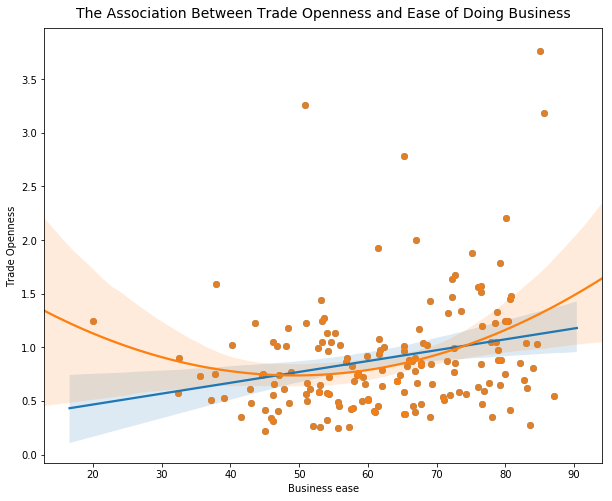

In [13]:
plt.figure(figsize=(10,8))
sns.regplot(x="business_ease", y="openness", scatter=True, data=data)
sns.regplot(x="business_ease", y="openness", scatter=True, order=2, data=data)
plt.xlabel('Business ease')
plt.ylabel('Trade Openness')
plt.title ("The Association Between Trade Openness and Ease of Doing Business", fontsize=14, y=1.01)

Text(0.5, 1.01, 'The Association Between Trade Openness and Ease of Doing Business')

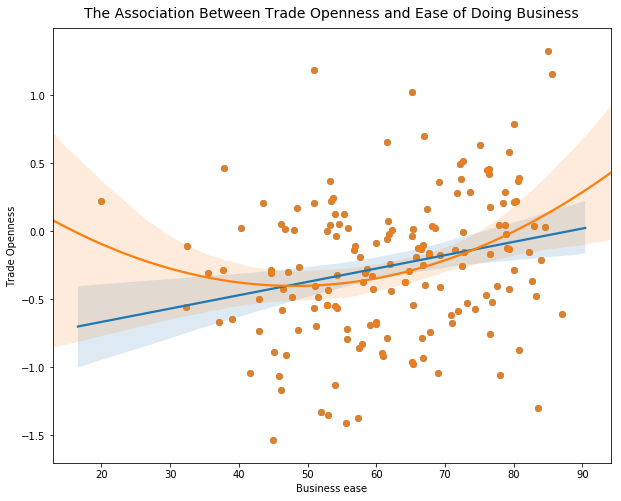

In [14]:
plt.figure(figsize=(10,8))
sns.regplot(x="business_ease", y="log_o", scatter=True, data=data)
sns.regplot(x="business_ease", y="log_o", scatter=True, order=2, data=data)
plt.xlabel('Business ease')
plt.ylabel('Trade Openness')
plt.title ("The Association Between Trade Openness and Ease of Doing Business", fontsize=14, y=1.01)

## Exploring the Relationship between Trade Openness & Remoteness

Text(0.5, 1.01, 'The Association Between Trade Openness and Remoteness')

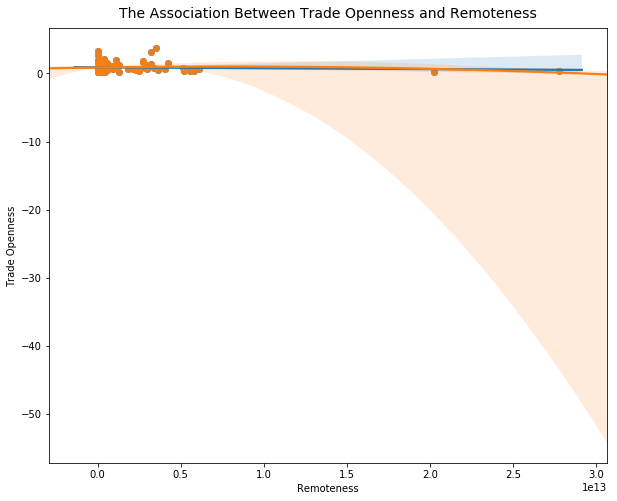

In [15]:
plt.figure(figsize=(10,8))
sns.regplot(x="remoteness", y="openness", scatter=True, data=data)
sns.regplot(x="remoteness", y="openness", scatter=True, order=2, data=data)
plt.xlabel('Remoteness')
plt.ylabel('Trade Openness')
plt.title ("The Association Between Trade Openness and Remoteness", fontsize=14, y=1.01)

Text(0.5, 1.01, 'The Association Between Trade Openness and Remoteness')

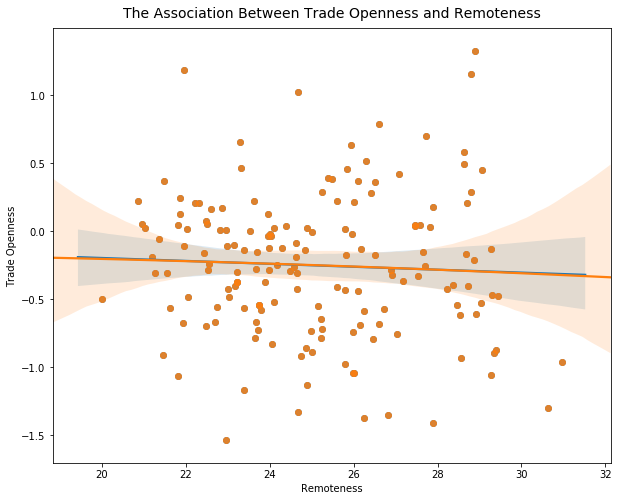

In [16]:
plt.figure(figsize=(10,8))
sns.regplot(x="log_r", y="log_o", scatter=True, data=data)
sns.regplot(x="log_r", y="log_o", scatter=True, order=2, data=data)
plt.xlabel('Remoteness')
plt.ylabel('Trade Openness')
plt.title ("The Association Between Trade Openness and Remoteness", fontsize=14, y=1.01)

## Regression Model

OLS regression model for the association between Trade Openness and Country's Level of Income

In [19]:
model = smf.ols(formula='log_o ~ log_gdp', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_o   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     15.34
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           0.000133
Time:                        23:24:44   Log-Likelihood:                -117.43
No. Observations:                 162   AIC:                             238.9
Df Residuals:                     160   BIC:                             245.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1757      0.239     -4.922      0.000      -1.647      -0.704
log_gdp        0.1069      0.027      3.917      0.000       0.053       0.161
==============================================================================
Omnibus:                        1.077   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.584   Jarque-Bera (JB):                0.700
Skew:                          -0.012   Prob(JB):                        0.705
Kurtosis:                       3.321   Cond. No.                         53.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Refit linear regression to transformed data
model = smf.ols(formula='log_o ~ log_gdp + log_r', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_o   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     15.95
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.85e-07
Time:                        23:24:59   Log-Likelihood:                -110.03
No. Observations:                 162   AIC:                             226.1
Df Residuals:                     159   BIC:                             235.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0729      0.394      0.185      0.853      -0.705       0.850
log_gdp        0.1827      0.033      5.606      0.000       0.118       0.247
log_r         -0.0759      0.019     -3.899      0.000      -0.114      -0.037
==============================================================================
Omnibus:                        4.177   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                4.098
Skew:                           0.235   Prob(JB):                        0.129
Kurtosis:                       3.621   Cond. No.                         278.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Refit linear regression to transformed data
model = smf.ols(formula='log_o ~ log_gdp + log_r + landlocked', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_o   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     10.74
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.83e-06
Time:                        23:25:06   Log-Likelihood:                -109.82
No. Observations:                 162   AIC:                             227.6
Df Residuals:                     158   BIC:                             240.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1708      0.422      0.405      0.686      -0.662       1.004
log_gdp        0.1784      0.033      5.357      0.000       0.113       0.244
log_r         -0.0777      0.020     -3.946      0.000      -0.117      -0.039
landlocked    -0.0647      0.099     -0.655      0.513      -0.260       0.130
==============================================================================
Omnibus:                        3.942   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                3.785
Skew:                           0.230   Prob(JB):                        0.151
Kurtosis:                       3.591   Cond. No.                         298.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Refit linear regression to transformed data
model = smf.ols(formula='log_o ~ log_gdp + log_r + landlocked + business_ease', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_o   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     11.14
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.58e-08
Time:                        23:25:10   Log-Likelihood:                -104.61
No. Observations:                 162   AIC:                             219.2
Df Residuals:                     157   BIC:                             234.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8273      0.457      1.809      0.072      -0.076       1.731
log_gdp           0.0954      0.041      2.306      0.022       0.014       0.177
log_r            -0.1130      0.022     -5.127      0.000      -0.157      -0.069
landlocked       -0.1929      0.104     -1.857      0.065      -0.398       0.012
business_ease     0.0156      0.005      3.227      0.002       0.006       0.025
==============================================================================
Omnibus:                        5.252   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.838
Skew:                           0.358   Prob(JB):                       0.0890
Kurtosis:                       3.453   Cond. No.                         863.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Findings

The final model describes 22,1% variation in dependant variable. Effect of 'landlockedness' on a country was not statistically significant. There were no indication of confounding variables.

According to the model trade openness have statisticaly significat relationship with GDP per capita, economical remoteness and ease of doing business with p-values of 0.022, <0.0001, and 0.002 accordingly. 

Income levels of a country positively assosiated with Trade Openness. For every 1% increase in GPD per capita trade opennes of a country increases approximately by 0.095%

Economical remoteness of a country is negatevely assosiated with trade openness. For every 1% increase in remoteness trade openness decreases by 0.11%

Ease of doing business is positively assosiated with trade openness. For every 1 point inclease in a score, trade opennes increases by 1.57%

## Testing Assumptions of the Final Model

### Normality

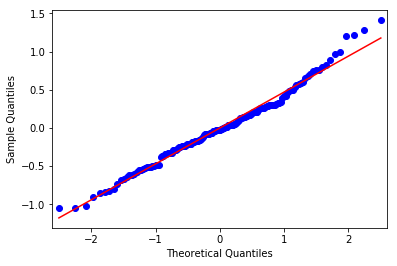

In [24]:
#Q-Q plot 
sm.qqplot(model.resid, line='r')
plt.show()

Text(0.5, 1.01, 'The Distribution of Residuals')

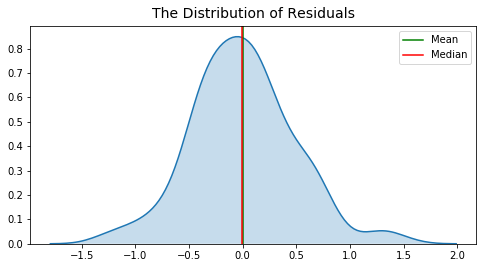

In [25]:
#set figure size
plt.figure(figsize=(8,4))

# Plot kernel density distribution of residuals
sns.kdeplot(model5.resid, shade=True)

# Plot vertical line on the mean of the distribution
plt.axvline(model5.resid.mean(), color='green')

# Plot vertical line on the median of the distribution
plt.axvline(model5.resid.median(), color='red')

plt.legend(labels=['Mean','Median'])

plt.title("The Distribution of Residuals", fontsize=14, y=1.01)

#### Findings

The residuals are approximately normally distributed, however, there is some unexplained curvilinearity.

### Homoscedasticity

Text(0.5, 0, 'Observation Number')

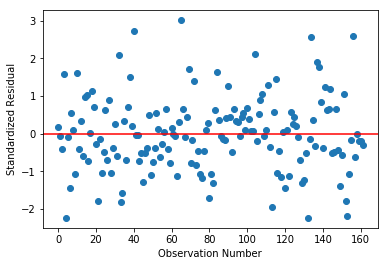

In [26]:
# simple plot of residuals
plt.plot(model.resid_pearson, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')

#### Findings

Most residuals fall within one standard deviation of the mean. However, there is a skew in the data with more residuals being close to 3 standard deviation of the mean then to -3.

### Linearity

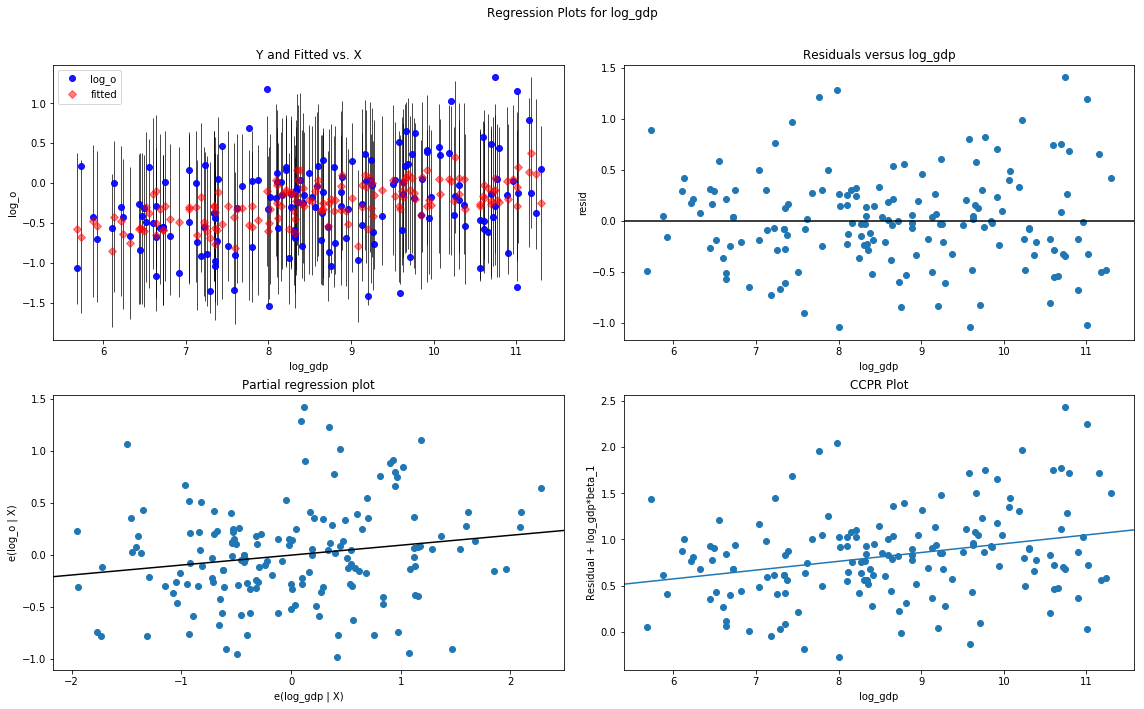

In [28]:
# additional regression diagnostic plots for levels of income

fig = plt.figure(figsize=(16, 10))
sm.graphics.plot_regress_exog(model,  "log_gdp", fig=fig)
plt.show()

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted')]

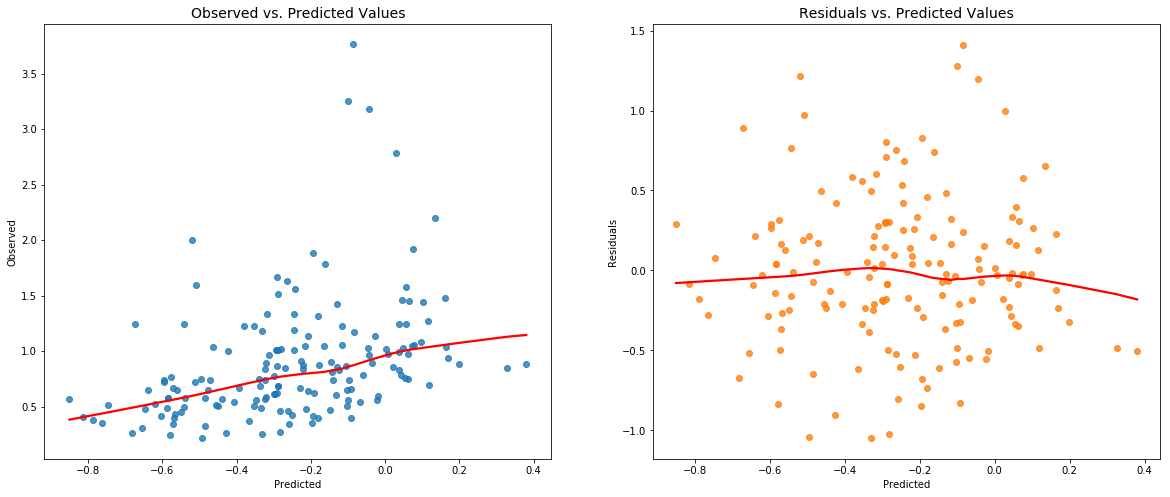

In [35]:
# Set two axes on one figure
fig, ax = plt.subplots(1,2,figsize=(20,8))

# Plot linear regression model fit for Observed vs. Predicted Values
sns.regplot(x=model.predict(), y=data['openness'], lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize=14)
ax[0].set(xlabel='Predicted', ylabel='Observed')

# Plot linear regression model fit for Residuals vs. Predicted Values
sns.regplot(x=model.predict(), y=model.resid, lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize=14)
ax[1].set(xlabel='Predicted', ylabel='Residuals')

#### Findings

Again, we see a curvilinear pattern in the distribution of the residuals and predicted values. However, evaluating regression plots for GDP per capita the distribution of the data seems random and does not shape a certain pattern.

### Outliers

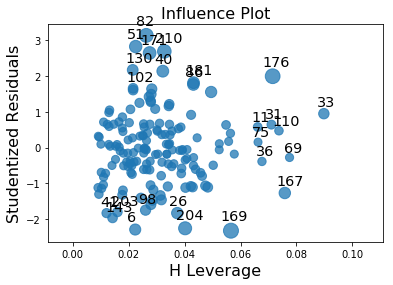

In [34]:
# leverage plot
sm.graphics.influence_plot(model, size=15, alpha=0.1)
plt.show()

#### Findings
There seem to be no outliers that have high leverage.